In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_theme(style='white', palette='rainbow', font_scale=1.2)
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [61]:
data.shape

(395, 33)

In [62]:
#check missing data -> There are no missing data
print(f"Length: {len(data)}")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns}")
#data.isnull().any()

Length: 395
Shape: (395, 33)
Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Visualize Resp

In [63]:
fig = plt.figure(figsize=(20, 16))
data.loc[data.G3 < 12, 'G3_binary'] = 0
data.loc[data.G3 >= 12, 'G3_binary'] = 1
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.0


<Figure size 2000x1600 with 0 Axes>

<AxesSubplot: xlabel='G3_binary', ylabel='count'>

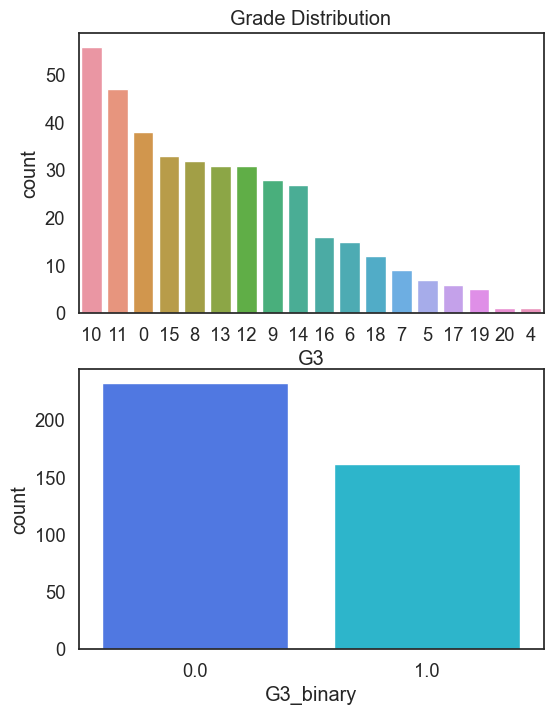

In [64]:
fig = plt.figure(figsize=(6, 8))
fig.add_subplot(2, 1, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index).set_title("Grade Distribution")
fig.add_subplot(2, 1, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index)

In [65]:
# plt.figure(figsize=(25, 16))
# sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

### Age & Gender

<AxesSubplot: xlabel='finalGrade', ylabel='count'>

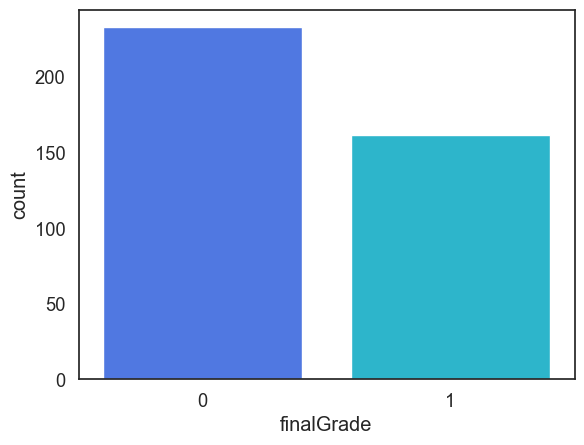

In [66]:
### Marking Final Grade as Categorical Value & Viewing their Count
data['finalGrade'] = np.where(data['G3'] >= 12, 'Pass', 'Fail')
data['finalGrade'].replace(['Fail', 'Pass'], [0, 1], inplace=True)
sns.countplot(x='finalGrade', data=data)

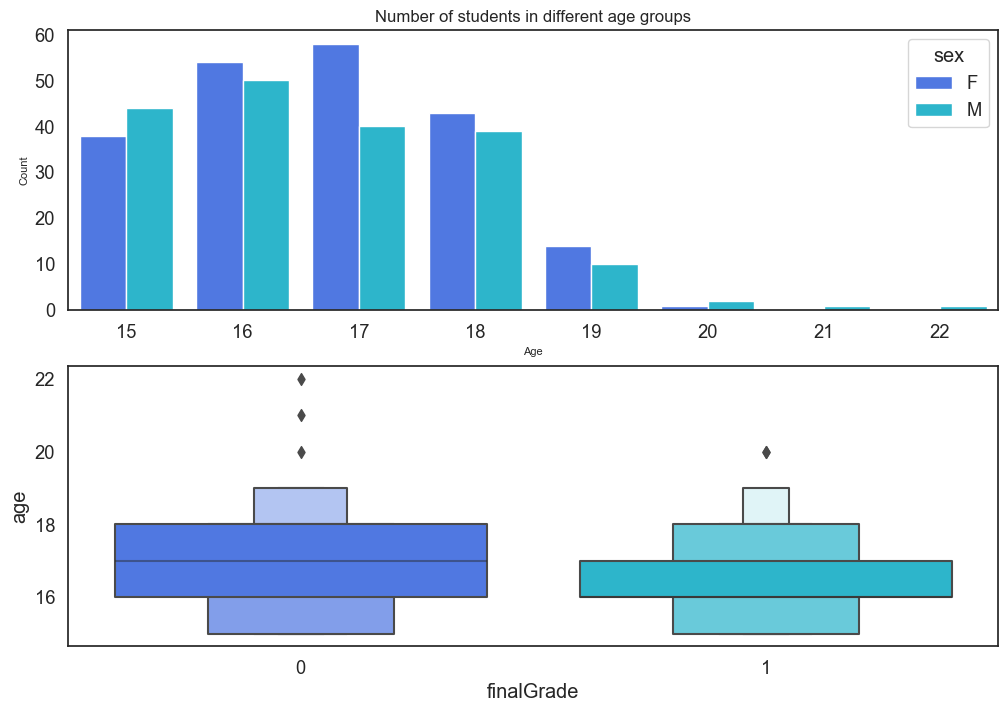

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

age_pl = sns.countplot(data=data, x='age', hue='sex', ax=axes[0])
age_pl.axes.set_title('Number of students in different age groups', fontsize=12)
age_pl.set_xlabel("Age", fontsize=8)
age_pl.set_ylabel("Count", fontsize=8)

sns.boxenplot(x='finalGrade', y='age', data=data, ax=axes[1])
plt.show()

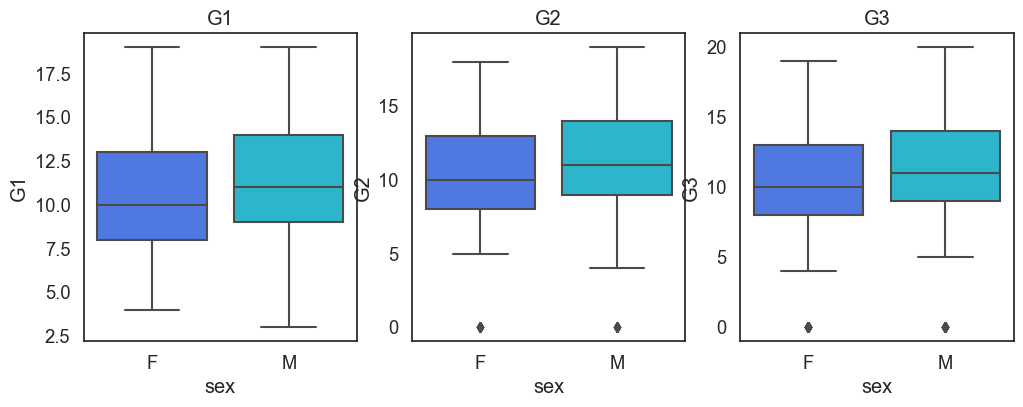

In [68]:
#Whether there's a gender difference in grade distribution in G3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1 = sns.boxplot(data=data, x='sex', y='G1', ax=axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data=data, x='sex', y='G2', ax=axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data=data, x='sex', y='G3', ax=axes[2])
ax3.set_title('G3')
plt.show()

Text(0.5, 0, 'age')

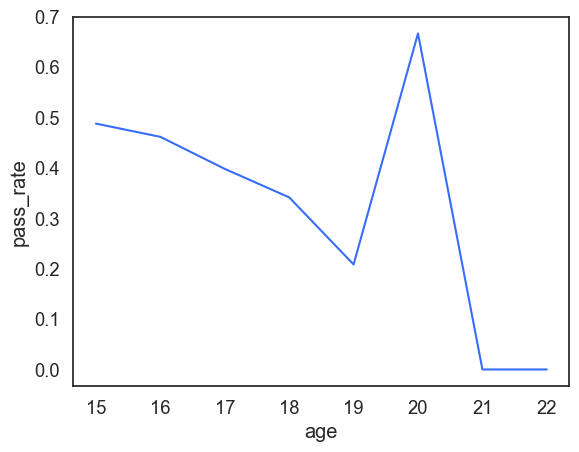

In [69]:
age_data = data.groupby('age')['finalGrade'].agg([('pass_rate', 'mean'), ('nobs', 'count')]).reset_index(drop=False)
sns.lineplot(x=age_data.age, y=age_data['pass_rate'])
plt.xlabel('age')


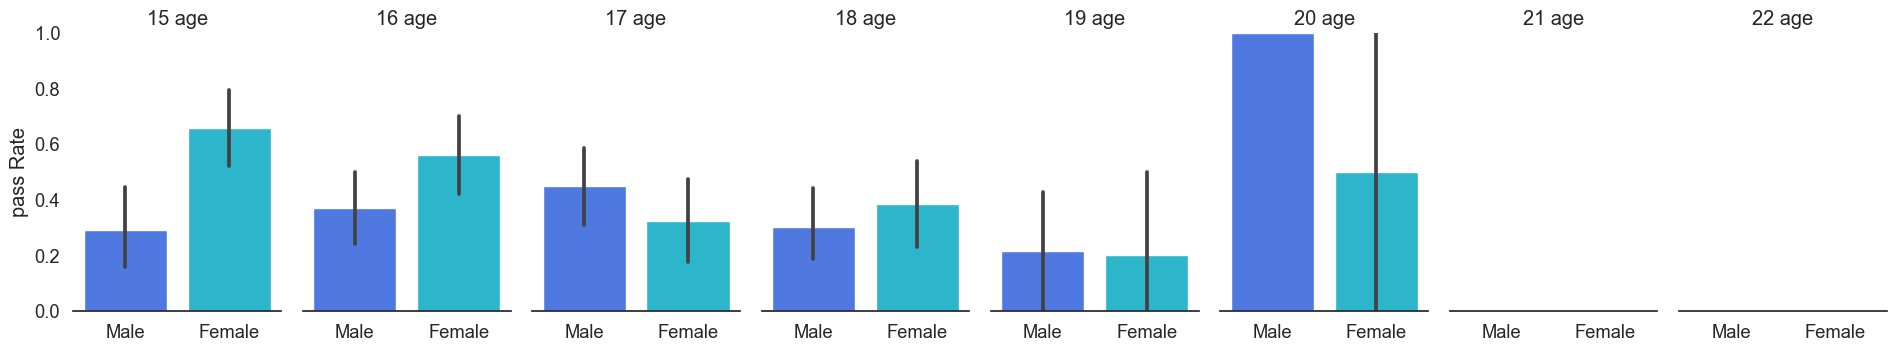

In [70]:
g = sns.catplot(
    data=data, x="sex", y="finalGrade", col="age",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "pass Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

### Study-related

Text(0.5, 1.0, 'Internet Access vs G3')

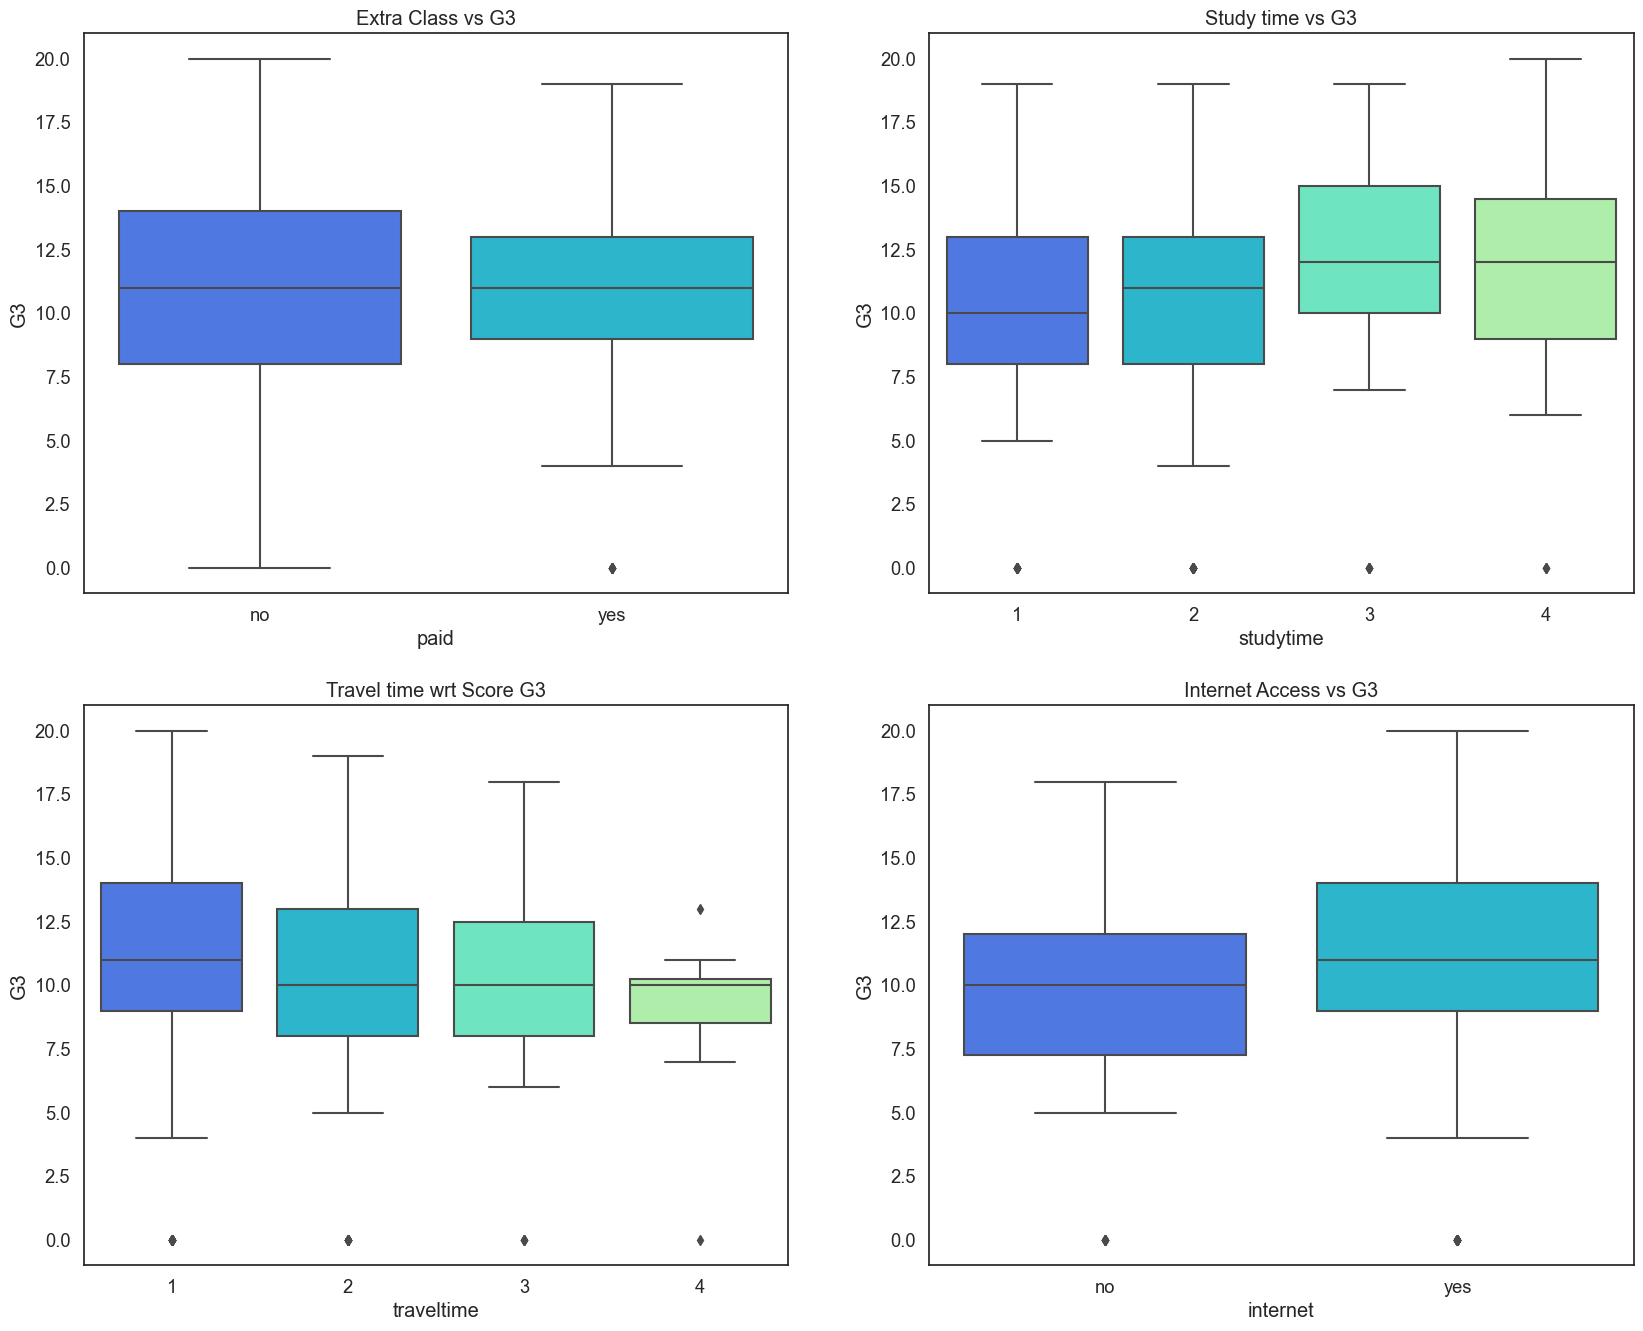

In [71]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='paid', y='G3', data=data).set_title('Extra Class vs G3')

fig.add_subplot(2, 2, 2)
sns.boxplot(x='studytime', y='G3', data=data).set_title('Study time vs G3')

fig.add_subplot(2, 2, 3)
sns.boxplot(x='traveltime', y='G3', data=data).set_title('Travel time wrt Score G3')

fig.add_subplot(2, 2, 4)
sns.boxplot(x='internet', y='G3', data=data).set_title('Internet Access vs G3')

## Address: Rural / Urban

Text(0, 0.5, 'Count')

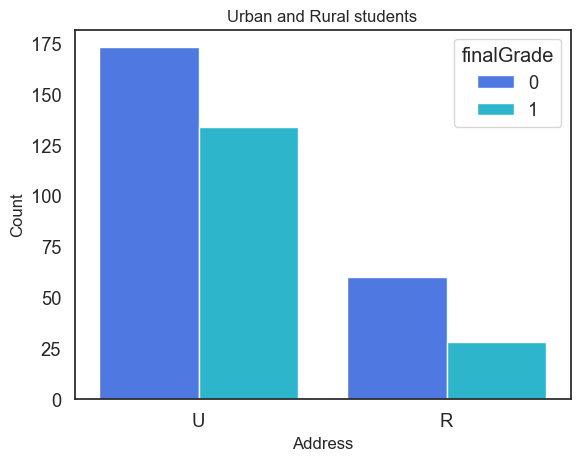

In [72]:
add_plt = sns.countplot(data=data, x='address', hue="finalGrade")
add_plt.axes.set_title('Urban and Rural students', fontsize=12)
add_plt.set_xlabel('Address', fontsize=12)
add_plt.set_ylabel('Count', fontsize=12)

### Parents Education
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Text(0.5, 0.98, 'Educated families result in Potentail higher grades in G1 & G2')

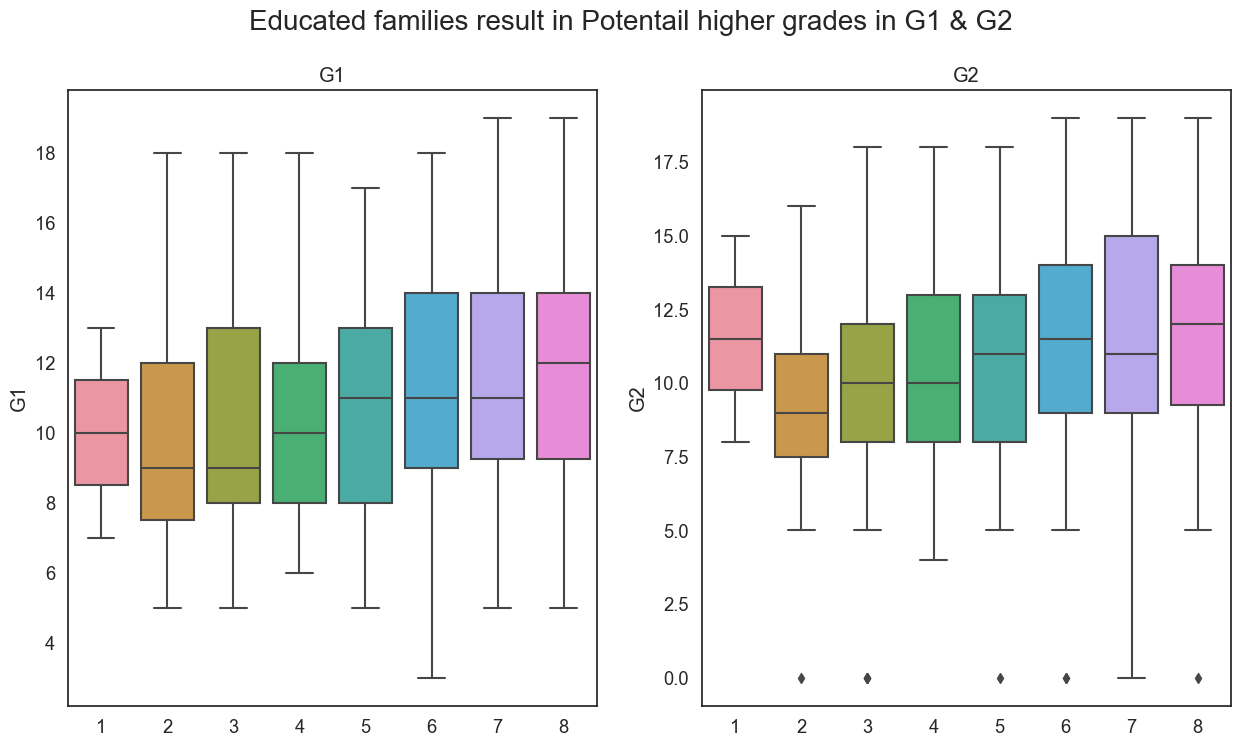

In [73]:
family_ed = data['Fedu'] + data['Medu']
# add_plt = sns.countplot(data = data, x =family_ed, hue = "Final Grade")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.boxplot(data=data, x=family_ed, y='G1', ax=axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data=data, x=family_ed, y='G2', ax=axes[1])
ax2.set_title('G2')

fig.suptitle('Educated families result in Potentail higher grades in G1 & G2', fontsize=20)

### Social Factors

Text(0.5, 1.0, 'Romantic Relation vs G3')

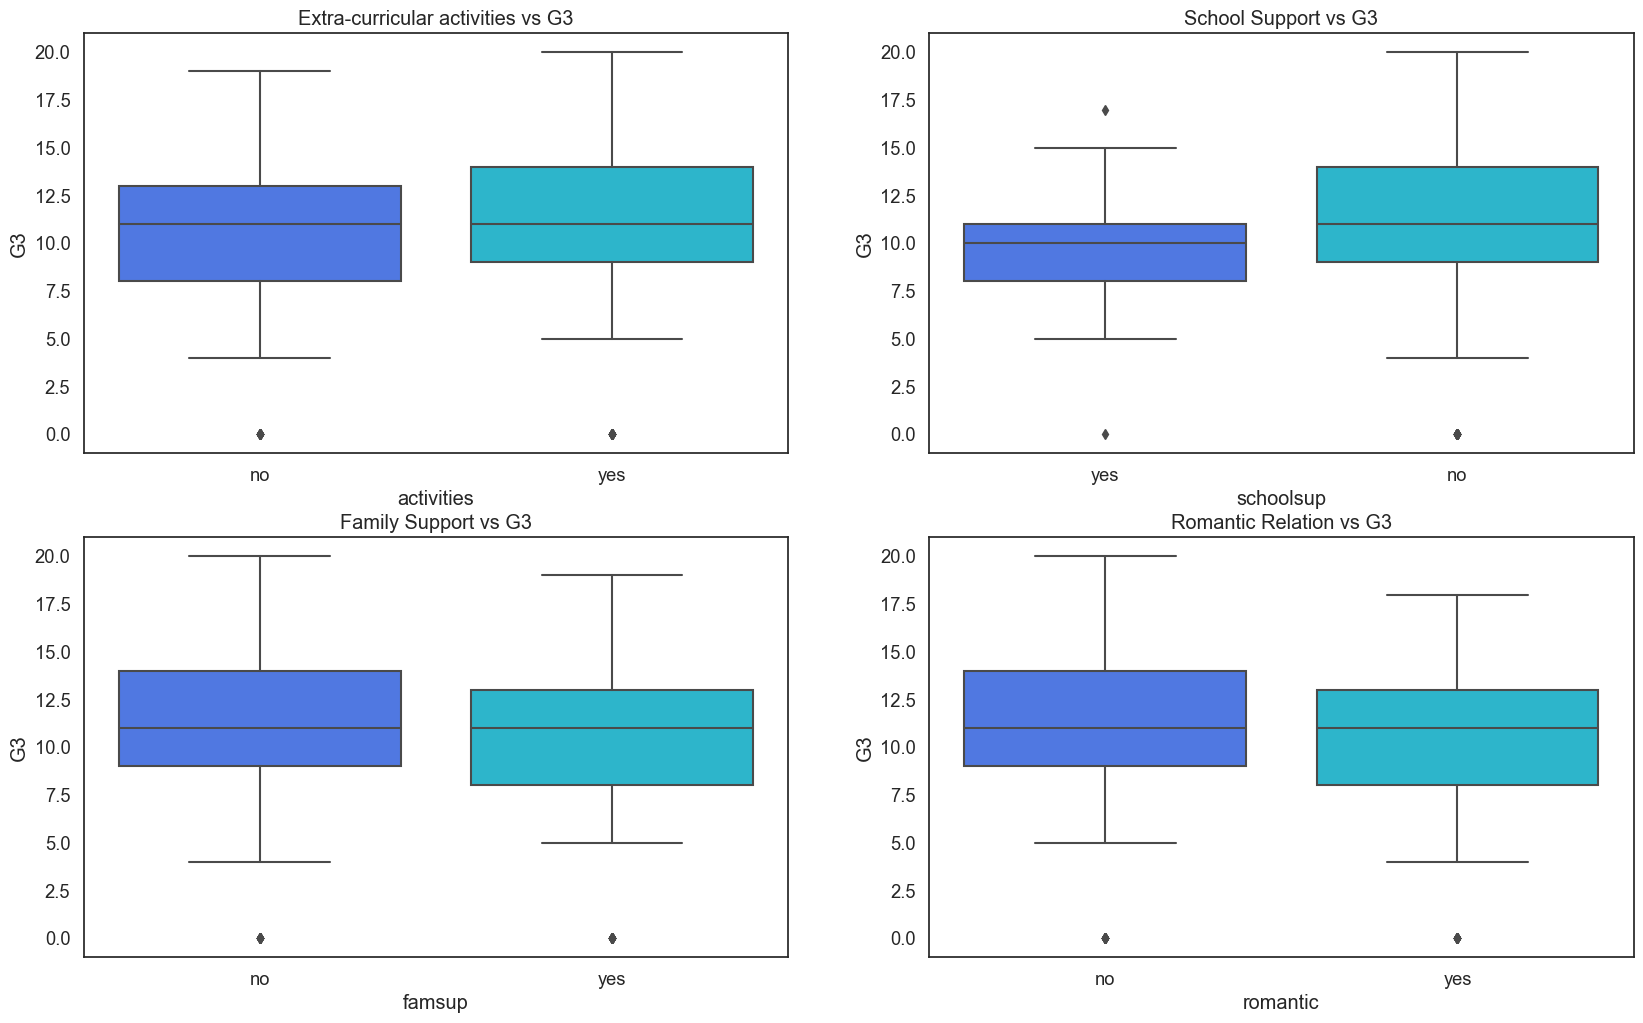

In [74]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='activities', y='G3', data=data).set_title('Extra-curricular activities vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('School Support vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='famsup', y='G3', data=data).set_title('Family Support vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('Romantic Relation vs G3')

## Behavioral

Text(0.5, 1.0, 'Walc vs G3')

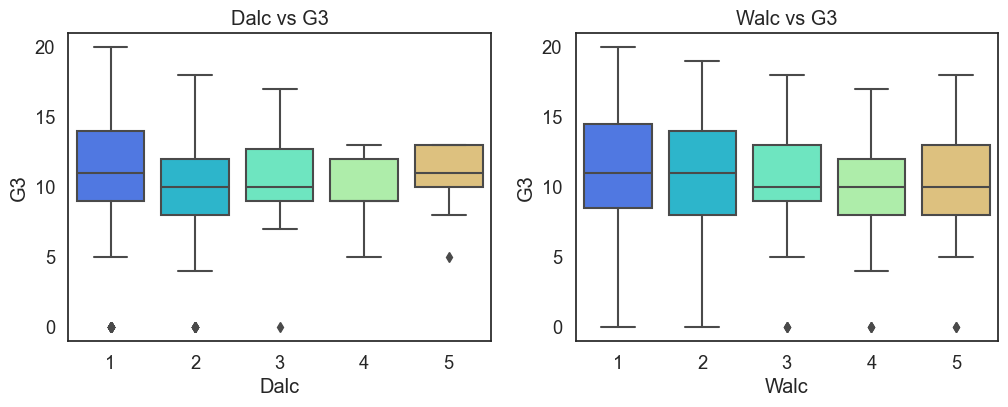

In [75]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data).set_title('Dalc vs G3')
fig.add_subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data).set_title('Walc vs G3')

Text(0.5, 1.0, 'romantic vs G3')

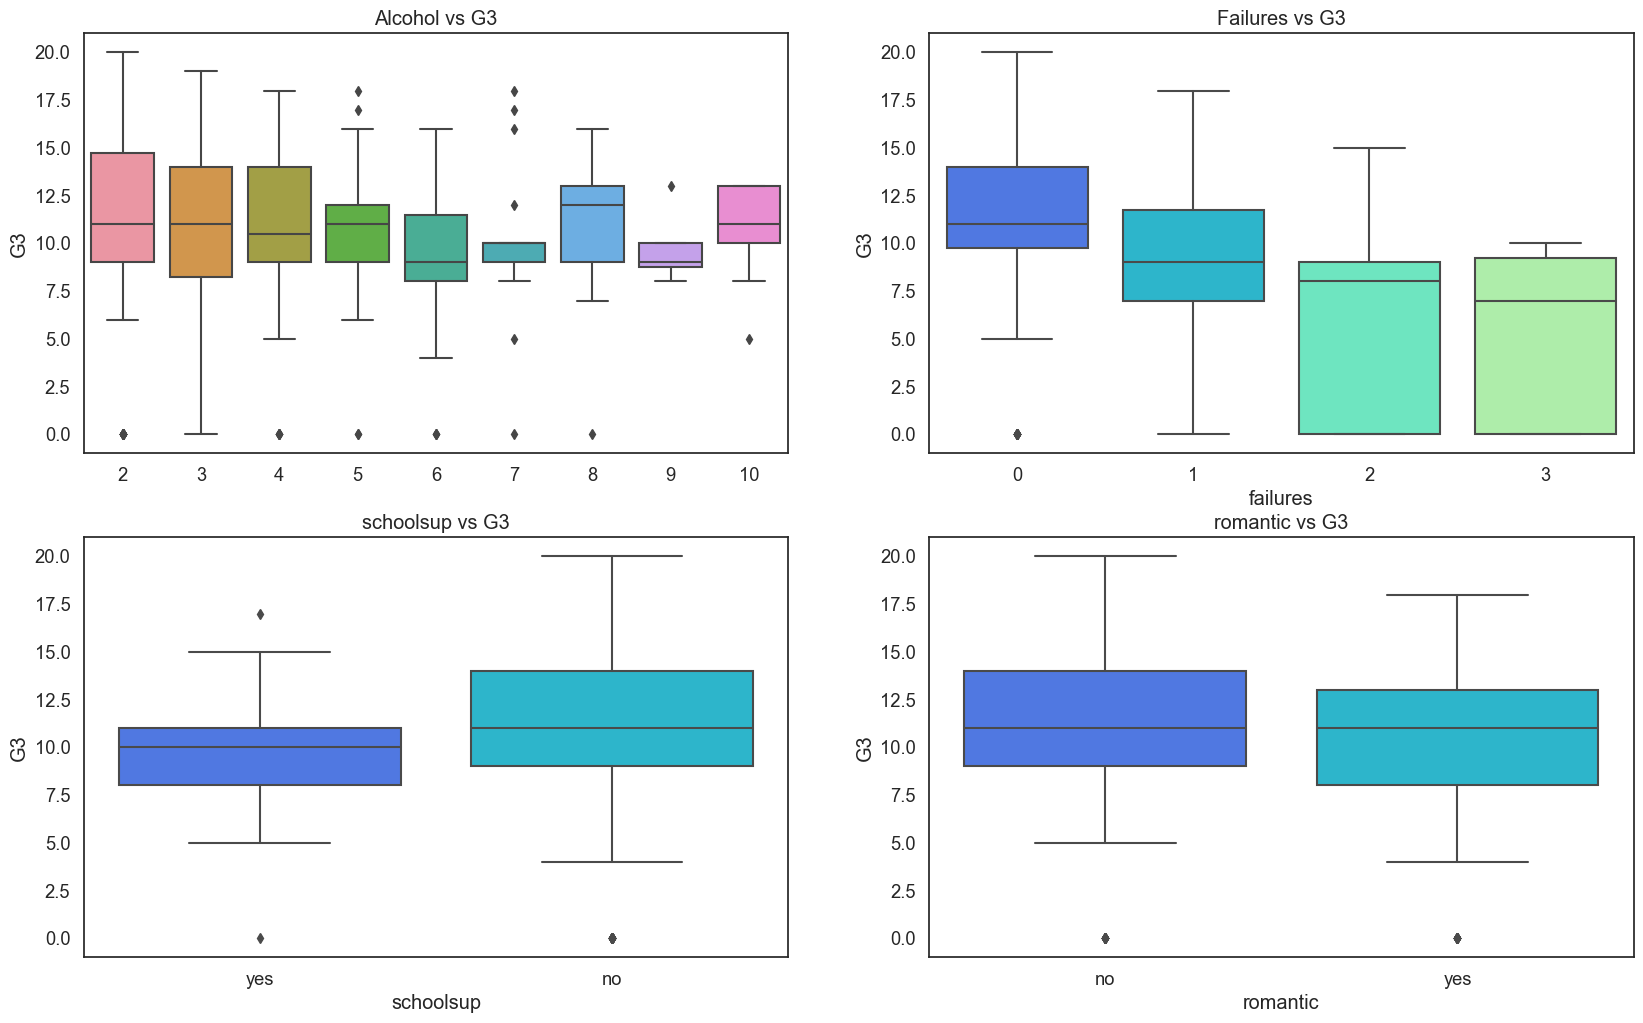

In [76]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
alc = data['Dalc'] + data['Walc']
sns.boxplot(x=alc, y='G3', data=data).set_title('Alcohol vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='failures', y='G3', data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('schoolsup vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('romantic vs G3')

Text(0.5, 1.0, 'G2 versus G3')

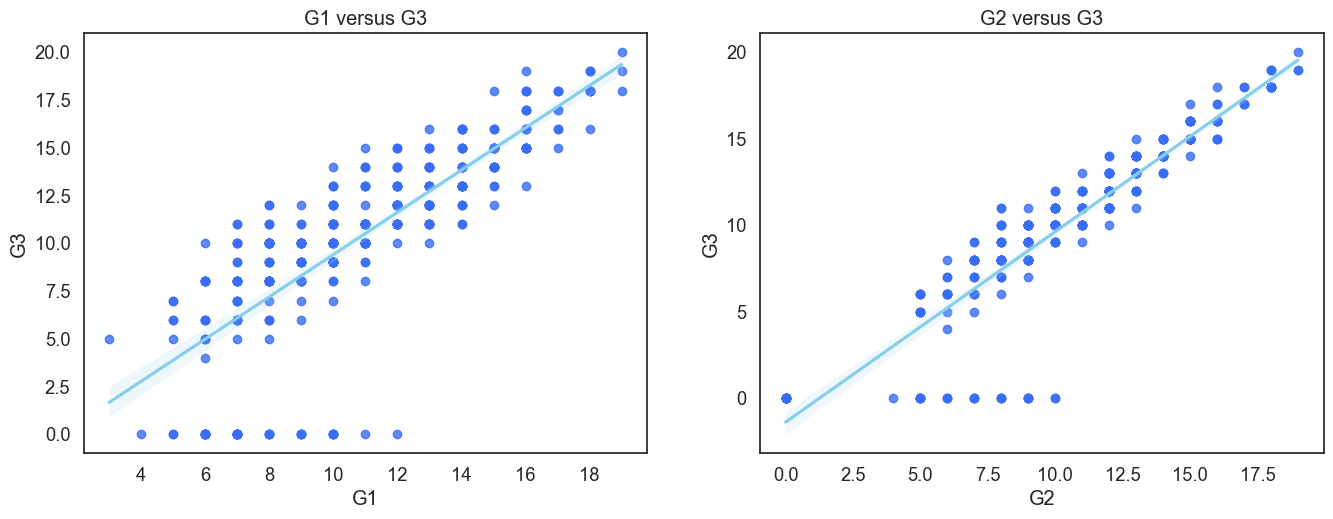

In [77]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G1 versus G3')
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G2 versus G3')

## Pre-Processsing

In [12]:
# read data
data = pd.read_csv("data/student-mat.csv")

# binary_mapping
data['school'] = data['school'].map({'GP': 0, 'MS': 1})
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['famsize'] = data['famsize'].map({'GT3': 0, 'LE3': 1})
data['address'] = data['address'].map({'R': 0, 'U': 1})
data['Pstatus'] = data['Pstatus'].map({'A': 0, 'T': 1})

binary_mapping = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(binary_mapping)
data['famsup'] = data['famsup'].map(binary_mapping)
data['paid'] = data['paid'].map(binary_mapping)
data['activities'] = data['activities'].map(binary_mapping)
data['nursery'] = data['nursery'].map(binary_mapping)
data['higher'] = data['higher'].map(binary_mapping)
data['internet'] = data['internet'].map(binary_mapping)
data['romantic'] = data['romantic'].map(binary_mapping)

# level-encoding
job_encoding = {'other': 0, 'at_home': 1, 'services': 2, 'health': 3, 'teacher': 4}
data['Mjob'] = data['Mjob'].map(job_encoding)
data['Fjob'] = data['Fjob'].map(job_encoding)
data['reason'] = data['reason'].map({'other': 0, 'home': 1, 'reputation': 2, 'course': 3})
data['guardian'] = data['guardian'].map({'other': 0, 'mother': 1, 'father': 2})

# combine Dalc and Walc into alc
data.loc[:, 'alc'] = data['Dalc'] + data['Walc']
# drop Dalc and Walc 
data = data.drop(columns=['Dalc', 'Walc'])
# drop G1 and G2
#data = data.drop(columns=['G1', 'G2'])

# data.head(3)
data.dtypes

In [13]:
X = data
y = data.G3

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

X_temp = X.drop(columns=['G1', 'G2', 'G3'])
k_best = SelectKBest(score_func=chi2, k=10)
k_best.fit(X_temp, y)
df_score = pd.Series(data=k_best.scores_, index=X_temp.columns)
df_score.sort_values(ascending=False)[1:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G3,alc
0,0,2,18,1,0,0,4,4,1,4,...,1,0,0,4,3,4,3,6,6,2
1,0,2,17,1,0,1,1,1,1,0,...,1,1,0,5,3,3,3,4,6,2
2,0,2,15,1,1,1,1,1,1,0,...,1,1,0,4,3,2,3,10,10,5
3,0,2,15,1,0,1,4,2,3,2,...,1,1,1,3,2,2,5,2,15,2
4,0,2,16,1,0,1,3,3,0,0,...,1,0,0,4,3,2,5,4,10,3


In [15]:
features_selected = df_score.nlargest(4).index
features_selected

## Train Test Split

In [11]:
# train = split
from sklearn.model_selection import train_test_split, KFold

k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train.head()

In [23]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# classifiers = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
# }

# for key, clf in classifiers.items():
#     print(key, clf)
#     score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-score)
#     rmse_score = np.mean(rmse)
#     print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

In [41]:
# lm_fit = LinearRegression().fit(X_train, y_train)
# lm_fit.coef_

In [42]:
# pred_score = lasso_fit.predict(X[selected])
# df_res = pd.DataFrame([pred_score,y], index=["pred","true"]).T
# df_res.loc[pred_score < 12] = 0
# df_res.loc[pred_score >= 12] = 1
# y[y < 12] = 0
# y[y >= 12] = 1
# # df_res
# np.mean(df_res.pred == df_res.true)

G3 ~ absences
R-Squared = 0.0016
Accuracy on test set: 1.0	full dataset: 1.0


# Linear Regression Model

In [40]:
train = pd.DataFrame(train)
train.head(3)

G3 ~ absences + failures  + guardian
R-Squared = 0.1275
Accuracy on test set: 1.0	full dataset: 1.0


In [87]:
# function to test prediction accuracy
def acc(_lm, _Xtest, _ytest):
    y_pred = _lm.predict(_Xtest)
    df = pd.concat([y_pred, _ytest], axis=1)
    test_res = pd.DataFrame(df, columns=["predicted", "actual"], dtype="float64")
    test_res[y_pred < 12], test_res[y_pred >= 12] = 0, 1
    test_res[y_pred < 6], test_res[y_pred >= 12] = 0, 1
    y_test[y_test < 12], y_test[y_test >= 12] = 0, 1
    return np.mean(test_res.predicted == test_res.actual)


# function to format and print result
def display_res(lm_formula):
    r2 = smf.ols(formula=lm_formula, data=train).fit().rsquared
    acc_test = acc(lm, test, y_test)
    acc_full = acc(lm, X, y)
    print(f"{lm_formula}\nR-Squared = {r2:.4f}\nAccuracy on test set: {acc_test}\tfull dataset: {acc_full}")

In [88]:
lm0 = 'G3 ~ absences'
display_res(lm0)

NameError: name 'lm' is not defined

In [ ]:
lm1 = 'G3 ~ absences + failures'
display_res(lm1)

In [ ]:
lm2 = 'G3 ~ absences + failures  + alc'
display_res(lm2)

In [ ]:
lm3 = 'G3 ~ absences + failures + alc + Fjob'
display_res(lm3)

In [ ]:
lm4 = 'G3 ~ absences + failures + schoolsup + romantic'
display_res(lm4)

# Nested Logistic Regression Model

Logistic regression using `G1` and `G2` as predictors

In [ ]:
nested_train = train[['G1', 'G2', 'G3']]
nested_test = test[['G1', 'G2', 'G3']]

In [ ]:
bins = pd.qcut(nested_train['G3'], 4, retbins=True)[1]
nested_train['G3_binned'] = pd.cut(nested_train['G3'], labels=['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)
nested_test['G3_binned'] = pd.cut(nested_test['G3'], labels=['Q1', 'Q2', 'Q3', 'Q4'], bins=bins, include_lowest=True)

In [ ]:
nested_train

In [ ]:
nested_train['G3_lower_50'] = (nested_train['G3_binned'] == 'Q1') | (nested_train['G3_binned'] == 'Q2')
nested_train['G3_lower_50'] = nested_train['G3_lower_50'].astype(int)
nested_test['G3_lower_50'] = (nested_test['G3_binned'] == 'Q1') | (nested_test['G3_binned'] == 'Q2')
nested_test['G3_lower_50'] = nested_test['G3_lower_50'].astype(int)

In [ ]:
def jitter(values, j):
    return values + np.random.normal(j, 0.02, values.shape)


sns.scatterplot(x=jitter(nested_train.G2, 0), y=jitter(nested_train.G3_lower_50, 0), data=nested_train,
                hue=nested_train.G3_binned)
logit_model_1 = smf.logit(formula='G3_lower_50~G1+G2', data=nested_train).fit()  #Developing logistic regression model
sns.lineplot(x='G2', y=logit_model_1.predict(nested_train), data=nested_train, color='blue')  #Visualizing model
plt.legend(loc='lower left')

In [ ]:
logit_model_1.summary()

In [ ]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(_data, actual_values, model, cutoff=0.5):
    #Predict the values using the Logit model
    pred_values = model.predict(_data)

    # Specify the bins
    _bins = np.array([0, cutoff, 1])

    #Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=_bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})

    # Calculate the accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    fnr = (cm[1, 0]) / (cm[1, 0] + cm[1, 1])
    precision = (cm[1, 1]) / (cm[0, 1] + cm[1, 1])
    _fpr = (cm[0, 1]) / (cm[0, 0] + cm[0, 1])
    _tpr = (cm[1, 1]) / (cm[1, 0] + cm[1, 1])

    #fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    #auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(_tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(_fpr))
    #print("ROC-AUC = {:.1%}".format(auc_value))

In [ ]:
confusion_matrix_data(nested_train, nested_train.G3_lower_50, logit_model_1, 0.5)

In [ ]:
nested_train['pred_lower_50'] = (logit_model_1.predict(nested_train) > .5).astype(int)

In [ ]:
lower_50 = nested_train[nested_train['pred_lower_50'] == 1]

In [ ]:
lower_50['Q1'] = (lower_50['G3_binned'] == 'Q1').astype(int)

In [ ]:
sns.scatterplot(x=jitter(lower_50.G2, 0), y=jitter(lower_50.Q1, 0), data=lower_50, hue=lower_50.G3_binned)
logit_model_2 = smf.logit(formula='Q1~G1+G2', data=lower_50).fit()
sns.lineplot(x='G2', y=logit_model_2.predict(lower_50), data=lower_50, color='blue')  #Visualizing model

In [ ]:
confusion_matrix_data(lower_50, lower_50.Q1, logit_model_2, 0.5)

In [ ]:
lower_50['pred_Q1'] = (logit_model_2.predict(lower_50) > 0.5).astype(int)

In [ ]:
lower_50['pred'] = np.where(lower_50['pred_Q1'], 'Q1', 'Q2')

In [ ]:
upper_50 = nested_train[nested_train['pred_lower_50'] == 0]
upper_50['Q4'] = (upper_50['G3_binned'] == 'Q4').astype(int)

In [ ]:
sns.scatterplot(x=jitter(upper_50.G2, 0), y=jitter(upper_50.Q4, 0), data=upper_50, hue=upper_50.G3_binned)
logit_model_3 = smf.logit(formula='Q4~G1+G2', data=upper_50).fit()
sns.lineplot(x='G2', y=logit_model_3.predict(upper_50), data=upper_50, color='blue')  #Visualizing model

In [ ]:
confusion_matrix_data(upper_50, upper_50.Q4, logit_model_3, 0.5)

In [ ]:
upper_50['pred_Q4'] = (logit_model_3.predict(upper_50) > 0.5).astype(int)
upper_50['pred'] = np.where(upper_50['pred_Q4'], 'Q4', 'Q3')

In [ ]:
nested_train['pred'] = lower_50['pred']
nested_train = nested_train.fillna({'pred': upper_50['pred']})

In [ ]:
nested_train['pred_v_actual'] = nested_train['G3_binned'] == nested_train['pred']

In [ ]:
nested_train.head()

In [ ]:
nested_train['pred_v_actual'].sum()

In [ ]:
nested_train['pred_v_actual'].sum() / nested_train.shape[0]

**Accuracy of predicting the quartile is 86% on train data.**

### With test data

In [ ]:
nested_test['pred_lower_50'] = (logit_model_1.predict(nested_test) > .5).astype(int)

In [ ]:
sns.scatterplot(x=jitter(nested_test.G2, 0), y=jitter(nested_test.G3_lower_50, 0), data=nested_test,
                hue=nested_test.G3_binned)
logit_model_1 = smf.logit(formula='G3_lower_50~G1+G2', data=nested_test).fit()  #Developing logistic regression model
sns.lineplot(x='G2', y=logit_model_1.predict(nested_test), data=nested_test, color='blue')  #Visualizing model

In [ ]:
confusion_matrix_data(nested_test, nested_test.G3_lower_50, logit_model_1, 0.5)

In [ ]:
test_lower_50 = nested_test[nested_test['pred_lower_50'] == 1]
test_lower_50['Q1'] = (test_lower_50['G3_binned'] == 'Q1').astype(int)
test_lower_50['pred_Q1'] = (logit_model_2.predict(test_lower_50) > 0.5).astype(int)
test_lower_50['pred'] = np.where(test_lower_50['pred_Q1'], 'Q1', 'Q2')

In [ ]:
confusion_matrix_data(test_lower_50, test_lower_50.Q1, logit_model_2, 0.5)

In [ ]:
test_upper_50 = nested_test[nested_test['pred_lower_50'] == 0]
test_upper_50['Q4'] = (test_upper_50['G3_binned'] == 'Q4').astype(int)
test_upper_50['pred_Q4'] = (logit_model_3.predict(test_upper_50) > 0.5).astype(int)
test_upper_50['pred'] = np.where(test_upper_50['pred_Q4'], 'Q4', 'Q3')

In [ ]:
confusion_matrix_data(test_upper_50, test_upper_50.Q4, logit_model_3, 0.5)

In [ ]:
nested_test['pred'] = test_lower_50['pred']
nested_test = nested_test.fillna({'pred': test_upper_50['pred']})
nested_test['pred_v_actual'] = (nested_test['G3_binned'] == nested_test['pred']).astype(int)

In [ ]:
nested_test['pred_v_actual'].sum() / nested_test.shape[0]

**84% accuracy on the test data.**

In [ ]:
nested_test

In [ ]:
cm_nested = nested_test.groupby(['G3_binned', 'pred']).size().unstack()

In [ ]:
ax = sns.heatmap(cm_nested, annot=True, cmap='Blues', fmt='g')
ax.set(ylabel='actual', xlabel='predicted')

### Linear model

In [ ]:
lm = smf.ols('G3 ~  G1 + G2', data=train).fit()
lm.summary()

In [ ]:
pred_test = lm.predict(test)
data = pd.concat([pred_test, y_test], axis=1)

In [ ]:
sns.scatterplot(x=test.G3, y=pred_test)
#In case of a perfect prediction, all the points must lie on the line x = y.
sns.lineplot(x=[0, test.G3.max()], y=[0, test.G3.max()], color='orange')  #Plotting the line x = y.
plt.xlabel('Actual grade')
plt.ylabel('Predicted grade')

Using the linear model, we were unable to identify the students who had a final grade of 0 from their G1 and G2, which would not be ideal if we want to identify students who might need more support.

# Model about Progress

In [ ]:
train['G1_G2'] = 0
train.loc[train.G2 > train.G1, 'G1_G2'] = 1
train['G2_G3'] = 0
train.loc[train.G3 > train.G2, 'G2_G3'] = 1

In [ ]:
train.head()

In [ ]:
pro_model = smf.logit(formula='G1_G2~absences+romantic+failures+schoolsup+alc+Fjob', data=train).fit()
pro_model.summary()

In [ ]:
confusion_matrix_data(train, train.G1_G2, pro_model, 0.3)

The previously useful predictors do not seem to function here.

In [ ]:
train.G1_G2.value_counts()

In [ ]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)

sns.lineplot(x='paid', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Extra Class vs G1 G2 Progress')

fig.add_subplot(2, 2, 2)
sns.lineplot(x='studytime', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Study time vs G1 G2 Progress')

fig.add_subplot(2, 2, 3)
sns.lineplot(x='traveltime', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Travel time wrt Score G1 G2 Progress')

fig.add_subplot(2, 2, 4)
sns.lineplot(x='internet', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Internet Access vs G1 G2 Progress')

In [ ]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='activities', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Extra-curricular activities vs G1 G2 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='schoolsup', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'School Support vs G1 G2 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='famsup', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Family Support vs G1 G2 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='absences', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Absences vs G1 G2 Progress')

In [ ]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='alc', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Alcohol vs G1 G2 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='failures', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Failures vs G1 G2 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='Fjob', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Father Job vs G1 G2 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='romantic', y='G1_G2', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Romantic Relationship vs G1 G2 Progress')

In [ ]:
pro_model2 = smf.logit(
    formula='G1_G2~paid+traveltime+I(traveltime**2)+alc*studytime+romantic+internet+Medu*Fedu+failures',
    data=train).fit()
pro_model2.summary()

In [ ]:
confusion_matrix_data(train, train.G1_G2, pro_model2, 0.35)

In [ ]:
from sklearn.metrics import roc_curve, auc

y = train.G1_G2
ypred = pro_model2.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)


def plot_roc_curve(_fpr, _tpr, label=None):
    plt.figure(figsize=(5, 5))
    plt.title('ROC Curve')
    plt.plot(_fpr, _tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")


fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)
print(auc(fpr, tpr))

In [ ]:
test['G1_G2'] = 0
test.loc[test.G2 > test.G1, 'G1_G2'] = 1
test['G2_G3'] = 0
test.loc[test.G3 > test.G2, 'G2_G3'] = 1

In [ ]:
confusion_matrix_data(test, test.G1_G2, pro_model2, 0.35)

In [ ]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)

sns.lineplot(x='paid', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Extra Class vs G2_G3 Progress')

fig.add_subplot(2, 2, 2)
sns.lineplot(x='studytime', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Study time vs G2_G3 Progress')

fig.add_subplot(2, 2, 3)
sns.lineplot(x='traveltime', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Travel time wrt Score G2_G3 Progress')

fig.add_subplot(2, 2, 4)
sns.lineplot(x='internet', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Internet Access vs G2_G3 Progress')


In [ ]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='activities', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Extra-curricular activities vs G2_G3 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='schoolsup', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'School Support vs G2_G3 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='famsup', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Family Support vs G2_G3 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='absences', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Absences vs G2_G3 Progress')

In [ ]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.lineplot(x='alc', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Alcohol vs G2_G3 Progress')
fig.add_subplot(2, 2, 2)
sns.lineplot(x='failures', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Failures vs G2_G3 Progress')
fig.add_subplot(2, 2, 3)
sns.lineplot(x='Fjob', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Father Job vs G2_G3 Progress')
fig.add_subplot(2, 2, 4)
sns.lineplot(x='Mjob', y='G2_G3', data=train, estimator=lambda Y: sum(Y == 1) / len(Y)).set_title(
    'Romantic Relationship vs G2_G3 Progress')

In [ ]:
train.head()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=10)
k_best.fit(train, train.G2_G3)
df_score = pd.Series(data=k_best.scores_, index=train.columns)
df_score.sort_values(ascending=False)[1:10]

# features_selected = df_score.nlargest(3).index

In [ ]:
train.head()

In [ ]:
pro_model4444 = smf.logit(formula='G2_G3 ~ failures * absences+ Mjob * Fjob + famrel + Medu', data=train).fit()
pro_model4444.summary()

In [ ]:
confusion_matrix_data(train, train.G2_G3, pro_model4444, 0.29)

In [ ]:
pro_model3 = smf.logit(formula='G2_G3~failures*absences+I(failures**2)+Mjob*Fjob + famrel', data=train).fit()
pro_model3.summary()

In [ ]:
confusion_matrix_data(train, train.G2_G3, pro_model3, 0.3)

In [ ]:
from sklearn.metrics import roc_curve, auc

y = train.G2_G3
ypred = pro_model3.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)


def plot_roc_curve(_fpr, _tpr, label=None):
    plt.figure(figsize=(5, 5))
    plt.title('ROC Curve')
    plt.plot(_fpr, _tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")


fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)
print(auc(fpr, tpr))

## use pro_model 3 and pro_model2

In [ ]:
intervals = pro_model2.get_prediction(train)

interval_table = intervals.summary_frame(alpha=0.05)

interval_table

In [ ]:
train['G2_improve'] = train.G2 - train.G1
train['G2_improve'].value_counts()